## Pràctica 4 NumPy: implementació de K-nearest neighbors

k-Nearest Neighbors (k-NN) és un algorisme d'aprenentatge automàtic supervisat que s'utilitza en problemes de classificació i regressió. La seva idea bàsica és senzilla: donat un conjunt de dades etiquetat (en el cas de la classificació) o amb valors objectius (en el cas de la regressió), k-NN classifica o prediu un nou punt de dades basant-se en les etiquetes o valors dels punts de dades més propers a aquest nou punt. El "k" en k-NN representa el nombre de veïns més propers que s'utilitzen per prendre decisions. Aquest mètode es basa en la suposició que punts similars tendeixen a estar propers en l'espai de característiques i, per tant, poden ser útils per predir o classificar nous punts.

Un exemple podria ser la classificació de pacients en funció de les seves característiques clíniques o biomarcadors.

Suposem que tens un conjunt de dades de pacients que inclou informació com ara edat, sexe, antecedents mèdics, valors de proves de laboratori i el diagnòstic final (per exemple, si un pacient té o no una determinada malaltia). Pots utilitzar k-NN per classificar nous pacients com a positiu o negatiu per a la malaltia en funció de les seves característiques.

Per exemple, si tens un pacient nou amb edat de 45 anys, sexe masculí, antecedents familiars de la malaltia i uns determinats valors de proves de laboratori, pots utilitzar un model k-NN ja entrenat amb les dades anteriors per predir si aquest pacient és propens a la malaltia o no. Si les característiques d'aquest pacient s'assemblen a les de pacients amb la malaltia segons el model, es classificarà com a positiu; en cas contrari, es classificarà com a negatiu.

Vegem com podem utilitzar la funció argsort al llarg de diversos eixos per trobar els veïns més propers de cada punt d'un conjunt. 

1. Començarem creant un conjunt aleatori de 10 punts, situats al plà entre el punt (0,0) i (10, 10). Per tal d'obtindre els mateixos punts pseudoaleatoris utilitza una semilla de valor 42. Els punts obtesos seran els següents:

    ![punts](../img/punts_knn.png)

In [77]:
# Resposta 1


2. Representa en un gràfic de dispersió (scatter) els punts anteriors. Afegeix una etiqueta a cada punt on indique quin punt és (amb plt.text(coordenada_x, coordenada_y, "etiqueta")). Imprimeix per consola els punts i comprova que la representació és correcta. 

In [78]:
# Resposta 2


3. Necessitem calcular la distància al quadrat entre cada parell de punts, per veure quins són els més pròxims. (Podriem utilitzar també la distància euclideana, però els més pròxims continuaran sent els mateixos punts, ja que si la distància és menor, el quadrat de la distància també. És a dir, si x < y, x² < y² ).

    Comencem calculant les diferències en les seues coordenades x i y, que ja calcularem en la pràctica de les figures, però esta vegada utilitzant numpy. Per a calcular les diferències necessitem utilitzar la [difusió](/U03%20Python%20aplicat%20al%20Big%20Data%20i%20Intel%C2%B7ligencia%20Artificial/1.%20NumPy/#5-calcul-en-matrius-difusio) i restar a una matriu de dimensions 10x1x2 una matriu de 1x10x2, obtenint una matriu resultant de 10x10x2. 
    
    La matriu de 10x1x2 serà una matriu de 10 files, 1 columna i profunditat 2. En cada fila, es tindran les coordenades x e y de cada punt.

    La matriu 1x10x2 contindrà la mateixa informació, esta vegada organitzat en forma d'1 fila, 10 columnes i 2 elements de profunditat.

    D'esta forma, aplicant la difusió, la matriu resultant creixerà per tindre unes dimensions de 10x10x2, on cada fila tindrà les distàncies en x i y d'un punt amb la resta. (Veure dibuix de difusió amb un plà de profunditat més).
    
    Comprova que obtens un array d'estes dimensions.

In [79]:
# Resposta 3

(10, 10, 2)

4. Comprova que la diferència entre punts siga correcta. Per exemple, entre els punt 0 (6, 3) i 1 (7, 4) hauria de ser (-1, -1).

In [80]:
# Resposta 4

array([-1, -1])

5. Eleva al quadrat les diferències en x i y (per eliminar l'efecte de distàncies negatives). La forma continuarà sent (10, 10, 2).

In [81]:
# Resposta 5

(10, 10, 2)

6. Suma les distàncies. El resultat ara seria de la forma (10, 10).

In [82]:
# Resposta 6

(10, 10)

7. Comprova que la distància al quadrat entre els punts 2 i 5 és 13 (2² + 3² = 13).

In [83]:
# Resposta 7

13

8. Calcula l'arrel quadrada de les distàncies al quadrat per obtindre la distància entre els punts.

In [84]:
# Resposta 7

array([[0.        , 1.41421356, 6.        , 5.        , 1.41421356,
        5.        , 1.41421356, 1.41421356, 6.40312424, 2.23606798],
       [1.41421356, 0.        , 5.09901951, 5.38516481, 0.        ,
        5.        , 2.        , 2.        , 6.70820393, 3.60555128],
       [6.        , 5.09901951, 0.        , 5.        , 5.09901951,
        3.60555128, 7.07106781, 5.09901951, 5.38516481, 8.06225775],
       [5.        , 5.38516481, 5.        , 0.        , 5.38516481,
        1.41421356, 6.40312424, 3.60555128, 1.41421356, 5.83095189],
       [1.41421356, 0.        , 5.09901951, 5.38516481, 0.        ,
        5.        , 2.        , 2.        , 6.70820393, 3.60555128],
       [5.        , 5.        , 3.60555128, 1.41421356, 5.        ,
        0.        , 6.40312424, 3.60555128, 2.        , 6.32455532],
       [1.41421356, 2.        , 7.07106781, 6.40312424, 2.        ,
        6.40312424, 0.        , 2.82842712, 7.81024968, 2.23606798],
       [1.41421356, 2.        , 5.0990195

9. Si extraiem la diagonal de l'anterior matriu (np.diagonal()), quin resultat obtenim? Perquè? Justifica la resposta.

In [85]:
# Resposta 9 (codi)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

- Resposta 9, justificació


10. Obtin mitjançant numpy, de forma ordenada, quins son els punt més pròxims a cada punt. És a dir, en la primera fila, estarn ordenats els índex dels punts més pròxims al punt zero, en la segona, al punt 1, ... Comprova el resultat mirant la gràfica de dispersió.

In [86]:
# Resposta 10

array([[0, 1, 4, 6, 7, 9, 3, 5, 2, 8],
       [1, 4, 0, 6, 7, 9, 5, 2, 3, 8],
       [2, 5, 3, 1, 4, 7, 8, 0, 6, 9],
       [3, 5, 8, 7, 0, 2, 1, 4, 9, 6],
       [1, 4, 0, 6, 7, 9, 5, 2, 3, 8],
       [5, 3, 8, 2, 7, 0, 1, 4, 9, 6],
       [6, 0, 1, 4, 9, 7, 3, 5, 2, 8],
       [7, 0, 1, 4, 6, 9, 3, 5, 8, 2],
       [8, 3, 5, 7, 2, 0, 1, 4, 9, 6],
       [9, 0, 6, 7, 1, 4, 3, 5, 8, 2]])

11. Repeteix l'ordenació, esta vegada amb la distància al quadrat.

In [87]:
# Resposta 11

array([[0, 1, 4, 6, 7, 9, 3, 5, 2, 8],
       [1, 4, 0, 6, 7, 9, 5, 2, 3, 8],
       [2, 5, 3, 1, 4, 7, 8, 0, 6, 9],
       [3, 5, 8, 7, 0, 2, 1, 4, 9, 6],
       [1, 4, 0, 6, 7, 9, 5, 2, 3, 8],
       [5, 3, 8, 2, 7, 0, 1, 4, 9, 6],
       [6, 0, 1, 4, 9, 7, 3, 5, 2, 8],
       [7, 0, 1, 4, 6, 9, 3, 5, 8, 2],
       [8, 3, 5, 7, 2, 0, 1, 4, 9, 6],
       [9, 0, 6, 7, 1, 4, 3, 5, 8, 2]])

12. Compara els dos arrays. Són iguals? Perquè? Justifica la resposta.

- Resposta 12


13. Perquè la primera columna de les dos matrius anteriors (distància i distància al quadrat) conté els números 0 a 9 ordenats (excepte el 4)? Raona la resposta.

- Resposta 13

14. Acabem de fer una classificació completa de les distàncies. Si ens interessa els 2 veïns més pròxims, com els obtenim?

In [88]:
# Resposta 14

array([[0, 1, 4],
       [1, 4, 0],
       [2, 5, 3],
       [3, 5, 8],
       [1, 4, 0],
       [5, 3, 8],
       [6, 0, 1],
       [7, 0, 1],
       [8, 3, 5],
       [9, 0, 6]])

15. Se t'ocórre algun mètode més eficient per a obtindre una ordenació més ràpida dels dos veïns més pròxims?

In [89]:
# Resposta 15

array([[0, 1, 4],
       [1, 4, 0],
       [2, 5, 3],
       [3, 5, 8],
       [1, 4, 0],
       [5, 3, 8],
       [6, 0, 1],
       [7, 0, 1],
       [8, 3, 5],
       [9, 0, 6]])

16. Executa el següent fragment de codi per representar gràficament els resultats.

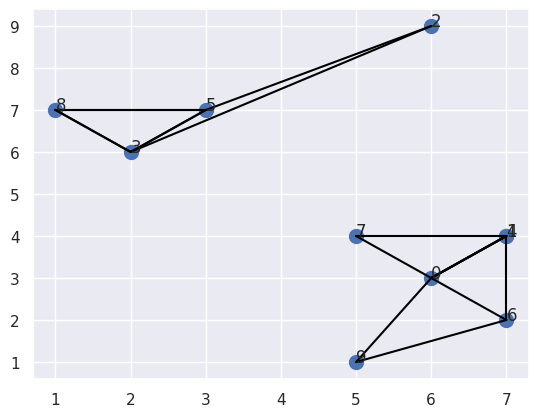

In [93]:
plt.scatter(punts[:, 0], punts[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(punts.shape[0]):
    plt.text(punts[i, 0], punts[i, 1], str(i))
    for j in dos_mes_proxims[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(punts[j], punts[i]), color='black')

17. Interpreta els resultats anteriors. 
    Imagina que a les dades anteriors, formen part d'un estudi d'una enfermetat. Els punts 2, 3, 5 i 8 son les dades de pacient amb l'enfermetat mentre que la resta, son les dades de pacients amb l'enfermetat.

    Les dades d'un nou pacient son [8, 3], creus que pateix l'enfermetat? I un pacient amb dades [2, 6]? Justifica les respostes.

- Resposta 17

18. Què passa amb un pacient amb dades [2,2]? Justifica la resposta.

# Resposta 18